In [3]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, recall_score, precision_score,make_scorer
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
np.random.seed(25)

In [21]:
flight_train = pd.read_csv('../input/flight_data_train.csv')
weather_train = pd.read_csv('../input/weather_data_train.csv')
weather_test = pd.read_csv('../input/weather_data_test.csv')

In [22]:
flight_train.head()

,Day_Id,Spot1 maxDistance,Spot1 totalDistance,Spot1 totalFlights,Spot2 maxDistance,Spot2 totalDistance,Spot2 totalFlights,Spot3 maxDistance,Spot3 totalDistance,Spot3 totalFlights,...,Spot285 totalFlights,Spot286 maxDistance,Spot286 totalDistance,Spot286 totalFlights,Spot287 maxDistance,Spot287 totalDistance,Spot287 totalFlights,Spot288 maxDistance,Spot288 totalDistance,Spot288 totalFlights
0,1,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
1,2,23.84,41.82,2,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,3,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,4,0.00,0.00,0,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
4,5,24.40,48.20,2,0.0,0.0,0,0.0,0.0,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


In [23]:
weather_train.head()

,Day_Id,Station1 Dew Point Height1,Station1 Dew Point Height2,Station1 Dew Point Height3,Station1 Dew Point Height4,Station1 Dew Point Height5,Station1 Dew Point Height6,Station1 Dew Point Height7,Station1 Dew Point Height8,Station1 Dew Point Height9,...,Station5 Wind Speed Height36,Station5 Wind Speed Height37,Station5 Wind Speed Height38,Station5 Wind Speed Height39,Station5 Wind Speed Height40,Station5 Wind Speed Height41,Station5 Wind Speed Height42,Station5 Wind Speed Height43,Station5 Wind Speed Height44,Station5 Wind Speed Height45
0,1,7.351064,7.328571,6.866540,6.410266,5.918868,5.309172,4.687870,4.066568,2.283636,...,52.213144,52.923623,53.634103,54.344583,55.055062,55.765542,56.264822,56.660079,57.093960,57.765101
1,2,2.086769,0.948308,-0.190154,-1.763636,-5.848000,-8.795752,-9.963894,-11.132035,-12.300177,...,3.924168,3.739211,3.554254,3.369297,3.184340,2.999383,2.814427,2.629470,2.444513,2.259556
2,3,2.014286,1.657143,1.400000,1.400000,0.407164,-0.727164,-1.861493,-2.995821,-4.086486,...,15.656836,15.388740,15.120643,14.882979,14.670213,14.457447,14.244681,14.031915,13.819149,13.606383
3,4,0.249462,-0.153846,-1.998723,-3.843600,-4.712595,-4.903435,-5.094275,-5.502703,-6.427273,...,39.408068,38.748642,38.089216,37.429791,36.770365,36.110939,35.451513,34.792087,34.132661,33.473235
4,5,2.827496,2.179510,1.599225,1.211628,0.824031,0.443396,0.066038,-0.311321,-0.688679,...,50.925714,50.354286,50.000000,50.000000,50.000000,49.557377,49.010929,50.613169,52.259259,53.762376


## Feature Engineering

Let's create target column using total number of flights taken on a day.

In [24]:
# select all columns with totalFlights
columns = flight_train.columns[flight_train.columns.str.endswith('totalFlights')]

# add a new columns TOTAL_FLIGHTS_FOR_ALL_SPOTS for all spots
flight_train['TOTAL_FLIGHTS_FOR_ALL_SPOTS'] = flight_train[columns].sum(axis=1)

# if TOTAL_FLIGHTS_FOR_ALL_SPOTS >= 15 it is a good day(1) otherwise bad day (0)
flight_train['Good_Bad'] = np.where(flight_train['TOTAL_FLIGHTS_FOR_ALL_SPOTS'] >=15, 1, 0)

## Merge flight data and weather data

In [25]:
weather_train = pd.merge(weather_train, flight_train[['Day_Id','Good_Bad']], on='Day_Id')

In [26]:
weather_train.head()

,Day_Id,Station1 Dew Point Height1,Station1 Dew Point Height2,Station1 Dew Point Height3,Station1 Dew Point Height4,Station1 Dew Point Height5,Station1 Dew Point Height6,Station1 Dew Point Height7,Station1 Dew Point Height8,Station1 Dew Point Height9,...,Station5 Wind Speed Height37,Station5 Wind Speed Height38,Station5 Wind Speed Height39,Station5 Wind Speed Height40,Station5 Wind Speed Height41,Station5 Wind Speed Height42,Station5 Wind Speed Height43,Station5 Wind Speed Height44,Station5 Wind Speed Height45,Good_Bad
0,1,7.351064,7.328571,6.866540,6.410266,5.918868,5.309172,4.687870,4.066568,2.283636,...,52.923623,53.634103,54.344583,55.055062,55.765542,56.264822,56.660079,57.093960,57.765101,0
1,2,2.086769,0.948308,-0.190154,-1.763636,-5.848000,-8.795752,-9.963894,-11.132035,-12.300177,...,3.739211,3.554254,3.369297,3.184340,2.999383,2.814427,2.629470,2.444513,2.259556,0
2,3,2.014286,1.657143,1.400000,1.400000,0.407164,-0.727164,-1.861493,-2.995821,-4.086486,...,15.388740,15.120643,14.882979,14.670213,14.457447,14.244681,14.031915,13.819149,13.606383,0
3,4,0.249462,-0.153846,-1.998723,-3.843600,-4.712595,-4.903435,-5.094275,-5.502703,-6.427273,...,38.748642,38.089216,37.429791,36.770365,36.110939,35.451513,34.792087,34.132661,33.473235,0
4,5,2.827496,2.179510,1.599225,1.211628,0.824031,0.443396,0.066038,-0.311321,-0.688679,...,50.354286,50.000000,50.000000,50.000000,49.557377,49.010929,50.613169,52.259259,53.762376,0


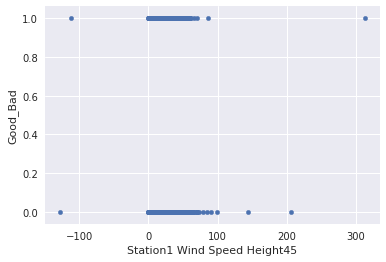

In [27]:
#scatter plot 
var = 'Station1 Wind Speed Height45'
data = pd.concat([weather_train['Good_Bad'], weather_train[var]], axis=1)
data.plot.scatter(x=var, y='Good_Bad');

In [11]:
weather_train.shape

(2183, 1127)

In [12]:
#remove outliers
# 1. Negative wind speeds
columns = weather_train.columns[weather_train.columns.str.contains('Wind Speed')]
for i in columns:
    weather_train = weather_train[weather_train[i] >= 0]
    
# 2. Pressure at height 45
columns = weather_train.columns[weather_train.columns.str.contains('Pressure Height45')]
for i in columns:
    weather_train = weather_train[(weather_train[i] >= 500) & (weather_train[i] <= 600)]
weather_train.shape

(2169, 1127)

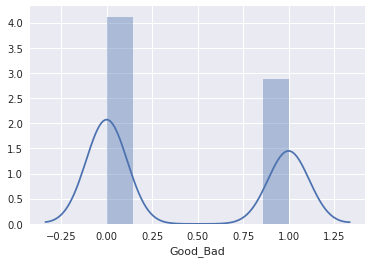

In [13]:
sns.distplot(weather_train['Good_Bad'])

In [14]:
# select features for model training
feature_names = [x for x in weather_train.columns if x not in ['Day_Id','Good_Bad']]
target = weather_train['Good_Bad']

## Model Validation

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_train[feature_names], target, test_size = 0.25, random_state = 42)

model = lgb.LGBMClassifier(lambda_l2=1.0,feature_fraction=0.6,num_boost_round=1200,num_leaves=9)
## model training and prediction
model.fit(X_train, y_train)
pred = model.predict(X_test)

## model performance evaluation using different matrices
print("LightGBM :\n")
print("confusion_matrix: " + str(confusion_matrix(pred, y_test.values)))
print("recall_score: " + str(recall_score(pred, y_test.values)))
print("precision_score: " + str(precision_score(pred, y_test.values)))
print("f1_score: " + str(f1_score(pred, y_test.values)))
print("accuracy_score: " + str(accuracy_score(pred, y_test.values)))
print("roc_auc_score: " + str(roc_auc_score(pred, y_test.values)))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LightGBM :

confusion_matrix: [[264  57]
 [ 71 151]]
recall_score: 0.6801801801801802
precision_score: 0.7259615384615384
f1_score: 0.7023255813953488
accuracy_score: 0.7642725598526704
roc_auc_score: 0.7513050433611181


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
model = lgb.LGBMClassifier(lambda_l2=1.0,feature_fraction=0.6,num_boost_round=1200,num_leaves=9)

## model training and prediction
model.fit(weather_train[feature_names], target)
pred = model.predict(weather_test[feature_names])

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
## make submission
sub = pd.DataFrame()
sub['Day_Id'] = weather_test['Day_Id']
sub['Good_Bad'] = pred.astype(int)
sub.to_csv('result.csv', index=False)

In [18]:
sub.head()

,Day_Id,Good_Bad
0,52,0
1,84,1
2,87,0
3,89,0
4,109,1
